In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [18]:
df = pd.read_csv("vehicles-florida.csv")

In [19]:
lux = ["lincoln","mercedes-benz","cadillac","lexus","audi","bmw","ferrari","tesla","aston-martin","alfa-romeo","jaguar"]
man = df["manufacturer"]

In [20]:
df.head()

Unnamed: 0       region  price    year   manufacturer  condition  \
0        1225  space coast   6000  2004.0           ford       good   
1        1261  space coast   7650  2012.0          honda       good   
2        1266  space coast   9850  2010.0        lincoln       good   
3        1280  space coast  12500  2015.0            kia       good   
4        1283  space coast   7500  2005.0  mercedes-benz  excellent   

     cylinders fuel  odometer title_status transmission drive       size  \
0  8 cylinders  gas   85841.0         lien       manual   rwd   mid-size   
1  4 cylinders  gas  112000.0        clean       manual   fwd   mid-size   
2  6 cylinders  gas  129960.0        clean    automatic   4wd  full-size   
3  4 cylinders  gas   97185.0        clean    automatic   rwd  full-size   
4  6 cylinders  gas   63500.0        clean    automatic   rwd  full-size   

    type paint_color  
0  coupe      orange  
1  sedan       black  
2    SUV      silver  
3    SUV      silver  
4  wagon      silver

In [21]:
man = man.array
for i,val in enumerate(man):
    if val in lux:
        man[i] = "luxury"
    else:
        man[i] = "normal"

In [23]:
df["manufacturer"] = man

In [25]:
df.head(50)

Unnamed: 0        region  price    year manufacturer  condition  \
0         1225   space coast   6000  2004.0       normal       good   
1         1261   space coast   7650  2012.0       normal       good   
2         1266   space coast   9850  2010.0       luxury       good   
3         1280   space coast  12500  2015.0       normal       good   
4         1283   space coast   7500  2005.0       luxury  excellent   
5         1295   space coast   9950  2010.0       normal       good   
6         1296   space coast   6900  2007.0       normal       good   
7         1315   space coast  17950  2017.0       normal       good   
8         1339   space coast  23800  2014.0       normal   like new   
9         1340   space coast   6200  2004.0       normal  excellent   
10        1341   space coast   7499  2011.0       normal   like new   
11        1388   space coast  43995  2010.0       normal   like new   
12        1392   space coast   4200  2007.0       normal       good   
13        1398   space coast  10600  2013.0       normal  excellent   
14        1401   space coast  55000  1960.0       normal       good   
15        1406   space coast   8950  2012.0       normal       good   
16        1408   space coast   4450  2006.0       normal       good   
17        1429   space coast  25995  2018.0       normal  excellent   
18        1439   space coast  14995  2019.0       normal   like new   
19        1440   space coast   6000  1995.0       normal       good   
20        1441   space coast  12888  2017.0       normal  excellent   
21        1442   space coast   7950  2008.0       normal  excellent   
22        1443   space coast   4950  2011.0       normal       good   
23        1447   space coast   3950  2007.0       normal       good   
24        1450   space coast  17950  2012.0       normal       good   
25        1456   space coast   6950  2009.0       normal       good   
26        1467   space coast   3995  2006.0       normal  excellent   
27        1468   space coast   2795  1994.0       normal  excellent   
28        1470   space coast   8450  2016.0       normal  excellent   
29        1472   space coast   6950  2012.0       normal       good   
30        1476   space coast  17800  2014.0       luxury  excellent   
31        1478   space coast  14950  2013.0       normal       good   
32        1480   space coast   3450  2005.0       normal       good   
33        1481   space coast   8950  2016.0       normal       good   
34        1483   space coast   6450  2008.0       normal       good   
35        1490   space coast   3750  2004.0       normal       good   
36        1497   space coast   5999  2004.0       luxury  excellent   
37        1502   space coast   4950  2012.0       normal  excellent   
38        1507  st augustine   2900  2003.0       normal       good   
39        1511  st augustine   4200  2001.0       normal       good   
40        1544   tallahassee  13500  2009.0       normal  excellent   
41        1545   tallahassee   7299  2009.0       luxury  excellent   
42        1549   tallahassee  15500  2012.0       normal  excellent   
43        1550   tallahassee  12500  2012.0       luxury  excellent   
44        1551   tallahassee  11500  2011.0       normal  excellent   
45        1552   tallahassee  23995  2013.0       luxury  excellent   
46        1553   tallahassee  12000  2010.0       normal  excellent   
47        1554   tallahassee   9500  2013.0       normal   like new   
48        1555   tallahassee   9500  2009.0       luxury  excellent   
49        1556   tallahassee   8500  2013.0       normal  excellent   

      cylinders    fuel  odometer title_status transmission drive  \
0   8 cylinders     gas   85841.0         lien       manual   rwd   
1   4 cylinders     gas  112000.0        clean       manual   fwd   
2   6 cylinders     gas  129960.0        clean    automatic   4wd   
3   4 cylinders     gas   97185.0        clean    automatic   rwd   
4   6 cylinders     gas   63500.0    

In [26]:
df.columns

Index(['Unnamed: 0', 'region', 'price', 'year', 'manufacturer', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color'],
      dtype='object')

In [27]:
df = df.drop(['Unnamed: 0', 'region'], axis=1)

In [28]:
df.head()

price    year manufacturer  condition    cylinders fuel  odometer  \
0   6000  2004.0       normal       good  8 cylinders  gas   85841.0   
1   7650  2012.0       normal       good  4 cylinders  gas  112000.0   
2   9850  2010.0       luxury       good  6 cylinders  gas  129960.0   
3  12500  2015.0       normal       good  4 cylinders  gas   97185.0   
4   7500  2005.0       luxury  excellent  6 cylinders  gas   63500.0   

  title_status transmission drive       size   type paint_color  
0         lien       manual   rwd   mid-size  coupe      orange  
1        clean       manual   fwd   mid-size  sedan       black  
2        clean    automatic   4wd  full-size    SUV      silver  
3        clean    automatic   rwd  full-size    SUV      silver  
4        clean    automatic   rwd  full-size  wagon      silver

In [29]:
df.shape

(4444, 13)

In [ ]:
df.to_csv("vehicles-final(USE)")

In [63]:
## MORE
df = pd.read_csv("vehicles.csv")

In [61]:
df.head()

Unnamed: 0  price    year manufacturer  condition    cylinders fuel  \
0           0   6000  2004.0       normal       good  8 cylinders  gas   
1           1   7650  2012.0       normal       good  4 cylinders  gas   
2           2   9850  2010.0       luxury       good  6 cylinders  gas   
3           3  12500  2015.0       normal       good  4 cylinders  gas   
4           4   7500  2005.0       luxury  excellent  6 cylinders  gas   

   odometer title_status transmission drive       size   type paint_color  
0   85841.0         lien       manual   rwd   mid-size  coupe      orange  
1  112000.0        clean       manual   fwd   mid-size  sedan       black  
2  129960.0        clean    automatic   4wd  full-size    SUV      silver  
3   97185.0        clean    automatic   rwd  full-size    SUV      silver  
4   63500.0        clean    automatic   rwd  full-size  wagon      silver

In [65]:
#new = df[df["year"] >= 2020]
df["year"] = 2020 - df["year"]
df.head()

Unnamed: 0  price  year manufacturer  condition    cylinders fuel  \
0           0   6000  16.0       normal       good  8 cylinders  gas   
1           1   7650   8.0       normal       good  4 cylinders  gas   
2           2   9850  10.0       luxury       good  6 cylinders  gas   
3           3  12500   5.0       normal       good  4 cylinders  gas   
4           4   7500  15.0       luxury  excellent  6 cylinders  gas   

   odometer title_status transmission drive       size   type paint_color  
0   85841.0         lien       manual   rwd   mid-size  coupe      orange  
1  112000.0        clean       manual   fwd   mid-size  sedan       black  
2  129960.0        clean    automatic   4wd  full-size    SUV      silver  
3   97185.0        clean    automatic   rwd  full-size    SUV      silver  
4   63500.0        clean    automatic   rwd  full-size  wagon      silver

In [66]:
new = df.rename(columns={"year":"years_old"})

In [70]:
new = new.drop(['Unnamed: 0'], axis=1)
new.head()
new.to_csv('vehicles-years_modified.csv')

KeyError: "['Unnamed: 0'] not found in axis"

In [71]:
new.to_csv('vehicles-years_modified.csv')

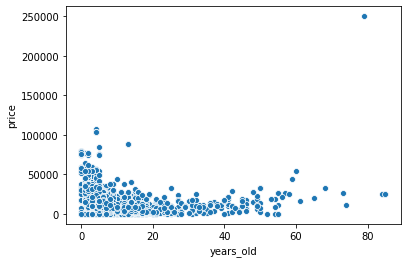

In [69]:
#new["years_old"] = np.sqrt(new["years"].to_numpy())
#sns.scatterplot(data=new, x="years_old", y="price")

In [72]:
new.head()

price  years_old manufacturer  condition    cylinders fuel  odometer  \
0   6000       16.0       normal       good  8 cylinders  gas   85841.0   
1   7650        8.0       normal       good  4 cylinders  gas  112000.0   
2   9850       10.0       luxury       good  6 cylinders  gas  129960.0   
3  12500        5.0       normal       good  4 cylinders  gas   97185.0   
4   7500       15.0       luxury  excellent  6 cylinders  gas   63500.0   

  title_status transmission drive       size   type paint_color  
0         lien       manual   rwd   mid-size  coupe      orange  
1        clean       manual   fwd   mid-size  sedan       black  
2        clean    automatic   4wd  full-size    SUV      silver  
3        clean    automatic   rwd  full-size    SUV      silver  
4        clean    automatic   rwd  full-size  wagon      silver

In [80]:
o = new["odometer"].array
res = []
for i, val in enumerate(o):
    if val >= 50000:
        res.append('very-high')
    elif val >= 15000:
        res.append('high')
    elif val >= 7000:
        res.append('average')
    else:
        res.append('low')
new['mileage'] = res
        

In [79]:
df.rename(columns={"year": "years-old"})
df.head(100)

Unnamed: 0  price  year manufacturer  condition     cylinders fuel  \
0            0   6000  16.0       normal       good   8 cylinders  gas   
1            1   7650   8.0       normal       good   4 cylinders  gas   
2            2   9850  10.0       luxury       good   6 cylinders  gas   
3            3  12500   5.0       normal       good   4 cylinders  gas   
4            4   7500  15.0       luxury  excellent   6 cylinders  gas   
..         ...    ...   ...          ...        ...           ...  ...   
95          95   8299  16.0       normal  excellent   6 cylinders  gas   
96          96      1   3.0       luxury  excellent   8 cylinders  gas   
97          97      1   6.0       normal  excellent   4 cylinders  gas   
98          98      1   5.0       normal  excellent  10 cylinders  gas   
99          99      1   0.0       normal  excellent  10 cylinders  gas   

    odometer title_status transmission drive       size   type paint_color  \
0    85841.0         lien       manual   rwd   mid-size  coupe      orange   
1   112000.0        clean       manual   fwd   mid-size  sedan       black   
2   129960.0        clean    automatic   4wd  full-size    SUV      silver   
3    97185.0        clean    automatic   rwd  full-size    SUV      silver   
4    63500.0        clean    automatic   rwd  full-size  wagon      silver   
..       ...          ...          ...   ...        ...    ...         ...   
95   98643.0        clean    automatic   rwd    compact  coupe         red   
96   41287.0        clean    automatic   4wd  full-size    SUV       black   
97   63494.0        clean       manual   4wd    compact  sedan        blue   
98   60717.0        clean        other   4wd  full-size  truck        grey   
99   17879.0        clean        other   4wd    compact  sedan        grey   

      mileage  
0   very-high  
1   very-high  
2   very-high  
3   very-high  
4   very-high  
..        ...  
95  very-high  
96       high  
97  very-high  
98  very-high  
99       high  

[100 rows x 15 columns]

In [81]:
new.head(20)

price  years_old manufacturer  condition    cylinders    fuel  odometer  \
0    6000       16.0       normal       good  8 cylinders     gas   85841.0   
1    7650        8.0       normal       good  4 cylinders     gas  112000.0   
2    9850       10.0       luxury       good  6 cylinders     gas  129960.0   
3   12500        5.0       normal       good  4 cylinders     gas   97185.0   
4    7500       15.0       luxury  excellent  6 cylinders     gas   63500.0   
5    9950       10.0       normal       good  6 cylinders     gas   87360.0   
6    6900       13.0       normal       good  6 cylinders     gas  192000.0   
7   17950        3.0       normal       good  6 cylinders     gas   47769.0   
8   23800        6.0       normal   like new  4 cylinders     gas   92000.0   
9    6200       16.0       normal  excellent  6 cylinders     gas  119223.0   
10   7499        9.0       normal   like new  4 cylinders     gas  107000.0   
11  43995       10.0       normal   like new  8 cylinders     gas    5354.0   
12   4200       13.0       normal       good  6 cylinders     gas  161982.0   
13  10600        7.0       normal  excellent  4 cylinders     gas   82740.0   
14  55000       60.0       normal       good  8 cylinders     gas     350.0   
15   8950        8.0       normal       good  4 cylinders     gas  136602.0   
16   4450       14.0       normal       good  8 cylinders     gas  171952.0   
17  25995        2.0       normal  excellent  4 cylinders     gas   33938.0   
18  14995        1.0       normal   like new  4 cylinders     gas   16654.0   
19   6000       25.0       normal       good  8 cylinders  diesel  260000.0   

   title_status transmission drive       size    type paint_color    mileage  
0          lien       manual   rwd   mid-size   coupe      orange  very-high  
1         clean       manual   fwd   mid-size   sedan       black  very-high  
2         clean    automatic   4wd  full-size     SUV      silver  very-high  
3         clean    automatic   rwd  full-size     SUV      silver  very-high  
4         clean    automatic   rwd  full-size   wagon      silver  very-high  
5         clean    automatic   rwd   mid-size   truck       white  very-high  
6         clean    automatic   rwd   mid-size  pickup       black  very-high  
7         clean    automatic   fwd   mid-size     SUV        blue       high  
8         clean    automatic   4wd  full-size     SUV       black  very-high  
9         clean    automatic   rwd   mid-size   truck       black  very-high  
10        clean    automatic   fwd    compact   sedan       brown  very-high  
11        clean    automatic   rwd  full-size   coupe       black        low  
12        clean    automatic   fwd  full-size   sedan       white  very-high  
13        clean       manual   fwd    compact   coupe       white  very-high  
14        clean    automatic   rwd  full-size   coupe      custom        low  
15        clean    automatic   fwd    compact   sedan       black  very-high  
16        clean    automatic   fwd   mid-size   sedan       black  very-high  
17        clean    automatic   4wd   mid-size   wagon        grey       high  
18        clean    automatic   fwd    compact   sedan       black       high  
19        clean    automatic   rwd  full-size   truck        grey  very-high

In [82]:
new.to_csv('final-vehicles.csv')